在深度学习训练过程中，常常需要根据训练的loss和准确率来决定后续的优化方向，我们会在训练过程中得到每一轮的loss和准确率，由此可以看出一个大概的趋势，但要更直观的看到训练中的变化，以及在何时达到最佳效果（再往后往往会过拟合），还是绘制成图表来看最好。

作者：Cloudox_
链接：https://www.jianshu.com/p/181e4e2367f9
来源：简书
著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

假设我们手头有训练过程中训练集和测试集的准确率数据，就可以用来绘图了，代码如下：

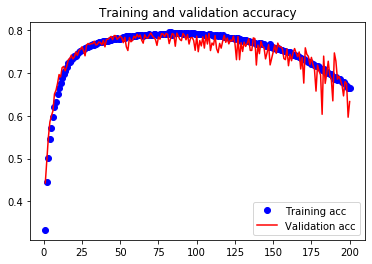

In [1]:
# -- coding: utf-8 --
import matplotlib.pyplot as plt

train_acc = [0.3328, 0.44612, 0.5021, 0.5446, 0.57214, 0.59706, 0.6206, 0.63282, 0.65218, 0.66634, 0.6777, 0.689, 0.6975, 0.7055, 0.71368, 0.72274, 0.72604, 0.72982, 0.73488, 0.7394, 0.741, 0.74424, 0.74892, 0.75082, 0.75492, 0.7555, 0.75822, 0.76122, 0.76104, 0.76428, 0.76584, 0.76736, 0.76706, 0.7686, 0.77036, 0.77186, 0.77248, 0.77298, 0.77522, 0.77556, 0.77624, 0.77592, 0.7769, 0.77786, 0.78014, 0.7809, 0.78072, 0.78278, 0.77998, 0.7809, 0.78232, 0.78466, 0.78268, 0.78638, 0.7867, 0.7871, 0.78422, 0.78802, 0.7874, 0.78712, 0.78844, 0.7895, 0.789, 0.78934, 0.78796, 0.78984, 0.79012, 0.78978, 0.79072, 0.79046, 0.78968, 0.79274, 0.79064, 0.78992, 0.79008, 0.79272, 0.7919, 0.79188, 0.79222, 0.79216, 0.79148, 0.79542, 0.7958, 0.79028, 0.793, 0.79338, 0.7943, 0.794, 0.79306, 0.7938, 0.79066, 0.79292, 0.79334, 0.79326, 0.79126, 0.79358, 0.79346, 0.79298, 0.79146, 0.79056, 0.79148, 0.79254, 0.79132, 0.79166, 0.78868, 0.7899, 0.78958, 0.79074, 0.79116, 0.79038, 0.7864, 0.78942, 0.78864, 0.7879, 0.7885, 0.78698, 0.78954, 0.78552, 0.78572, 0.78448, 0.78138, 0.78214, 0.78128, 0.78274, 0.78042, 0.78336, 0.78154, 0.7796, 0.77632, 0.7769, 0.77684, 0.77654, 0.77556, 0.7748, 0.77268, 0.7738, 0.77242, 0.76968, 0.76926, 0.768, 0.76986, 0.76944, 0.76718, 0.769, 0.76428, 0.76332, 0.7621, 0.76826, 0.76108, 0.75932, 0.75854, 0.75638, 0.75878, 0.7561, 0.75336, 0.75304, 0.75174, 0.751, 0.74988, 0.7502, 0.7506, 0.74376, 0.74148, 0.74348, 0.73974, 0.73992, 0.73722, 0.73576, 0.73392, 0.73308, 0.73194, 0.72748, 0.72538, 0.72506, 0.72218, 0.72112, 0.71956, 0.71576, 0.71718, 0.71526, 0.70878, 0.7073, 0.71062, 0.70376, 0.70372, 0.70012, 0.69818, 0.69692, 0.6917, 0.68564, 0.69178, 0.68422, 0.68548, 0.68564, 0.67906, 0.6783, 0.67342, 0.67052, 0.66476, 0.66408]
val_acc = [0.4429, 0.4978, 0.549, 0.5856, 0.5999, 0.6116, 0.6512, 0.6599, 0.676, 0.6967, 0.691, 0.7129, 0.7156, 0.7054, 0.7155, 0.7311, 0.7341, 0.7421, 0.7333, 0.7379, 0.7496, 0.7415, 0.7532, 0.7555, 0.7617, 0.7527, 0.7406, 0.7658, 0.7694, 0.7671, 0.7692, 0.769, 0.7749, 0.7662, 0.7671, 0.773, 0.7715, 0.7664, 0.7768, 0.7616, 0.7788, 0.7793, 0.7829, 0.786, 0.7785, 0.788, 0.7878, 0.7791, 0.783, 0.7865, 0.7834, 0.7714, 0.7837, 0.7615, 0.753, 0.7829, 0.7734, 0.7766, 0.7866, 0.782, 0.7906, 0.7844, 0.7892, 0.7775, 0.7702, 0.7896, 0.7833, 0.7816, 0.789, 0.794, 0.7875, 0.7834, 0.7791, 0.765, 0.7848, 0.7796, 0.7922, 0.7915, 0.7854, 0.7931, 0.7909, 0.7692, 0.7818, 0.7928, 0.7906, 0.763, 0.7937, 0.7867, 0.779, 0.7761, 0.793, 0.7882, 0.7781, 0.7901, 0.7682, 0.7828, 0.7835, 0.7764, 0.7534, 0.7867, 0.7502, 0.7761, 0.7638, 0.7849, 0.7587, 0.7892, 0.7682, 0.7929, 0.7529, 0.7705, 0.7658, 0.7879, 0.7572, 0.7479, 0.7697, 0.7586, 0.775, 0.7887, 0.7722, 0.7821, 0.7685, 0.7774, 0.7749, 0.7867, 0.7695, 0.7315, 0.7856, 0.7315, 0.7714, 0.7508, 0.7726, 0.7626, 0.77, 0.7807, 0.7533, 0.7532, 0.7825, 0.781, 0.719, 0.7657, 0.7457, 0.7746, 0.7624, 0.76, 0.7334, 0.7478, 0.7666, 0.7193, 0.7343, 0.7496, 0.7662, 0.7463, 0.7703, 0.7617, 0.7618, 0.7576, 0.7341, 0.7316, 0.7568, 0.7174, 0.7439, 0.7291, 0.7481, 0.7576, 0.7471, 0.7384, 0.7497, 0.7097, 0.7368, 0.6767, 0.7593, 0.7441, 0.7393, 0.7201, 0.7369, 0.7197, 0.7085, 0.6579, 0.7189, 0.7048, 0.6958, 0.6036, 0.7399, 0.676, 0.6988, 0.7279, 0.695, 0.6861, 0.6351, 0.7474, 0.7283, 0.6859, 0.6923, 0.6839, 0.6722, 0.6467, 0.6804, 0.6749, 0.5968, 0.6334]

epochs = range(1, len(train_acc)+1)
plt.plot(epochs, train_acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend() # 添加图例
plt.savefig("examples.png")
plt.show()

代码中我给出了两份准确率数组，表示训练过程中每一轮的准确率，然后使用plt绘图，plot就是绘图函数，参数包含了横坐标、纵坐标、绘制内容（bo表示蓝点，r表示红线，这个可以在Matplotlib 用户指南查看）、标签名（这个标签名就可以被图例使用了）。title函数表示图标的标题，legend函数表示要添加图例，可以设置位置，默认右下角。代码中既保存了图像，也做了显示。因为如果在服务器训练时想要绘图的话，很可能没法直接看，那就要保存然后再查看了。

这里尤其要注意的是，想要成功保存的话，一定要把保存语句写在show语句之前！！！否则你保存下来的将是一个新的空白图。

绘制的结果如上图所示。

从图中就可以很直观地感受到在训练70轮左右的时候就到达准确率的最高点了，在78%左右。

当然，也可以同时展示多张图，比如在训练后立马同时绘制准确率和loss的图：


In [ ]:
# -- coding: utf-8 --
import matplotlib.pyplot as plt

# 用keras训练后立即绘制
model = get_model() # 获取keras构建的模型
hist = model.fit(........) # 训练参数略去不表
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(train_acc)+1)
plt.plot(epochs, train_acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure() # 新建一个图

plt.plot(epochs, train_loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

这里中间用figure函数新建了一个图用来绘制第二张loss图。如果想要保存两张图的话，同样记得要在figure和show之前保存。